In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/housedata/output.csv
/kaggle/input/housedata/data.csv
/kaggle/input/housedata/data.dat


The real estate markets, like those in Sydney and Melbourne, present an interesting opportunity for data analysts to analyze and predict where property prices are moving towards. Prediction of property prices is becoming increasingly important and beneficial. Property prices are a good indicator of both the overall market condition and the economic health of a country. Considering the data provided, we are wrangling a large set of property sales records stored in an unknown format and with unknown data quality issues

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
from sklearn.linear_model import SGDRegressor,GammaRegressor,Lasso,GammaRegressor,ElasticNet,Ridge
from sklearn.linear_model import RANSACRegressor,HuberRegressor, BayesianRidge,LinearRegression
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, AdaBoostRegressor, GradientBoostingRegressor, ExtraTreesRegressor  
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor # Decision Tree Regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline # Streaming pipelines
from sklearn.model_selection import learning_curve, validation_curve, GridSearchCV # Model evaluation
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error,r2_score

In [3]:
data=pd.read_csv('/kaggle/input/housedata/data.csv')

In [4]:
data

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


### EDA

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [6]:
data.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [7]:
data.describe(include=np.number)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [8]:
data.describe(include=object)

,date,street,city,statezip,country
count,4600,4600,4600,4600,4600
unique,70,4525,44,77,1
top,2014-06-23 00:00:00,2520 Mulberry Walk NE,Seattle,WA 98103,USA
freq,142,4,1573,148,4600


In [9]:
data.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [10]:
data.drop(columns='date',inplace=True)

#### we can see that there is no null value

In [11]:
num_var=data.select_dtypes(include=np.number).columns.to_list()
cat_var=data.select_dtypes(include=object).columns.to_list()

In [12]:
cat_var

['street', 'city', 'statezip', 'country']

In [13]:
data1=data.copy() # to retain original data

### UNIVARIATE ANALYSIS

In [14]:
data1

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


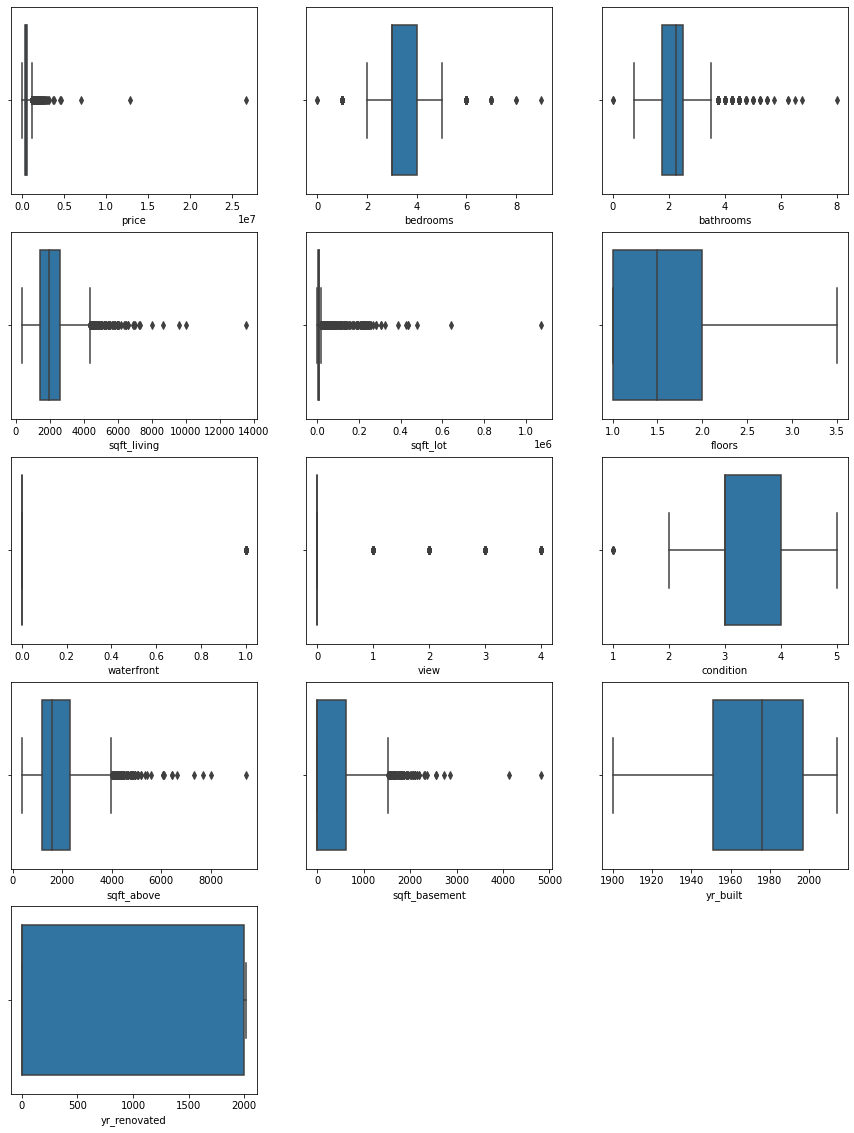

In [15]:
i=1
plt.figure(figsize=(15,20))
for j in num_var:
    plt.subplot(5,3,i)
    sns.boxplot(data=data1,x=j)
    i+=1

#### now we can see that there is some outliers in the data

In [16]:
def outlier_tret(x):
    upper=x.quantile(0.98)
    lower=x.quantile(0.2)
    x=np.where(x>upper,upper,x)
    x=np.where(x<lower,lower,x)
    return x

In [17]:
data1[num_var]=data1[num_var].apply(lambda x: outlier_tret(x))

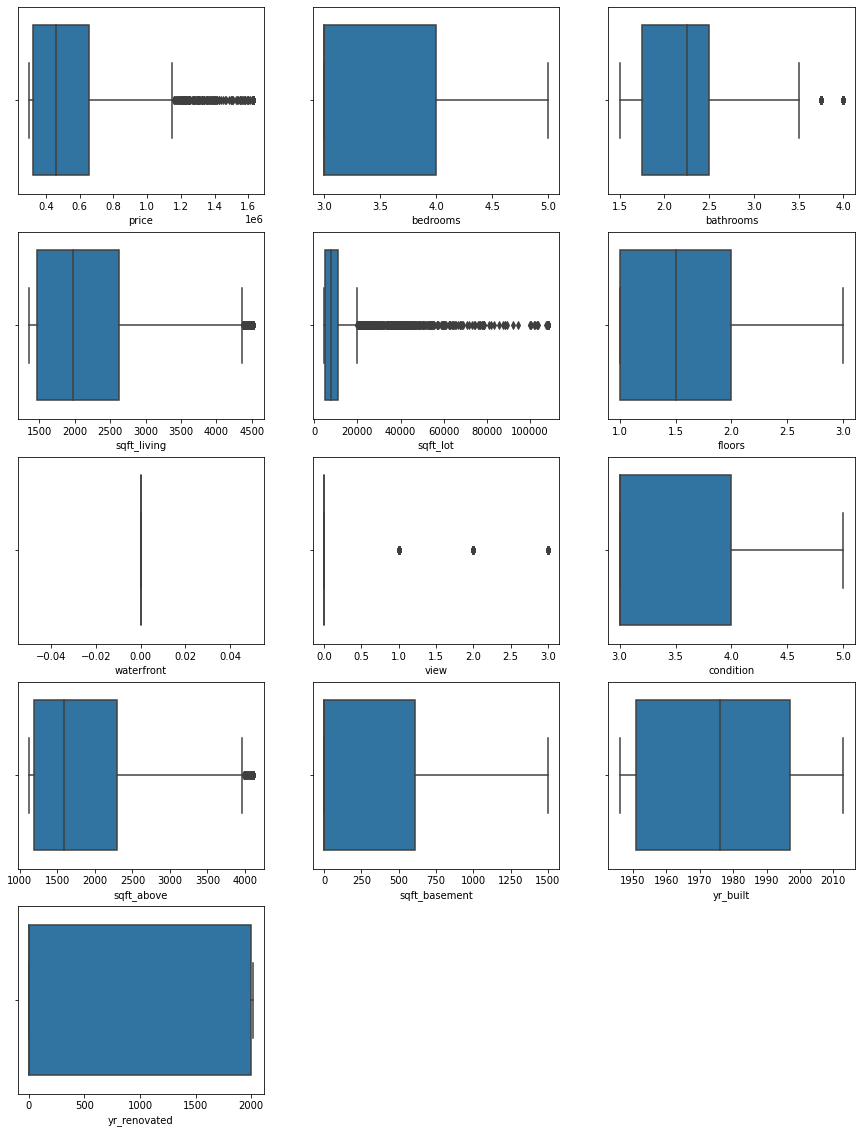

In [18]:
i=1
plt.figure(figsize=(15,20))
for j in num_var:
    plt.subplot(5,3,i)
    sns.boxplot(data=data1,x=j)
    i+=1

#### outliers has been removed

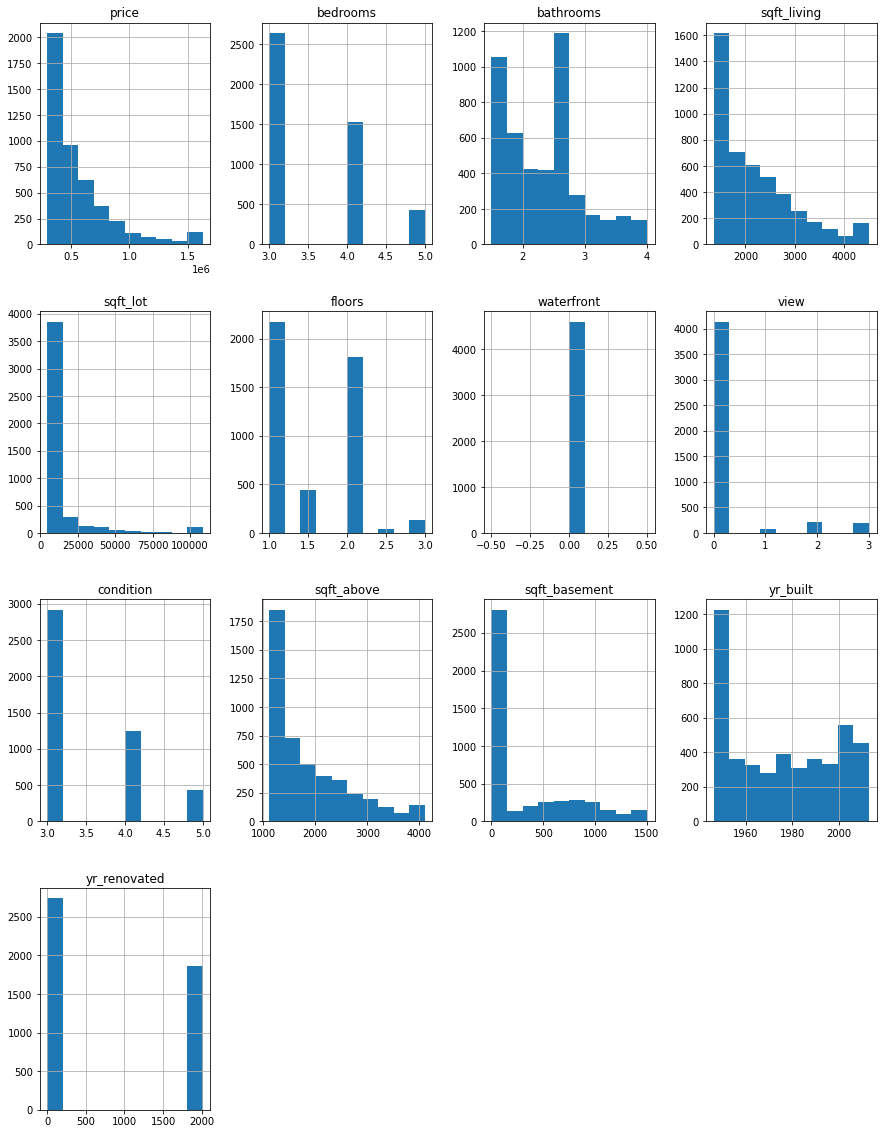

In [19]:

data1.hist(figsize=(15,20))
plt.show()

In [20]:
data1[cat_var].nunique()

street      4525
city          44
statezip      77
country        1
dtype: int64

#### we remove the street,country,statezip columns because this does'nt impact the price

In [21]:
data1.drop(columns=['street','statezip','country'],inplace=True)

### BIVARIATE ANALYSIS

In [22]:
data1.drop(columns='waterfront').corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
price,1.000000,0.329549,0.512974,0.676081,0.131891,0.267259,0.363471,0.048595,0.577786,0.289345,0.069010,-0.047007
bedrooms,0.329549,1.000000,0.477413,0.568967,0.085883,0.149982,0.110239,0.012974,0.449057,0.317819,0.099002,-0.043543
bathrooms,0.512974,0.477413,1.000000,0.738713,0.132793,0.500096,0.208301,-0.150688,0.677144,0.250436,0.504415,-0.204459
sqft_living,0.676081,0.568967,0.738713,1.000000,0.272234,0.343510,0.299009,-0.074446,0.865470,0.389990,0.314275,-0.120558
sqft_lot,0.131891,0.085883,0.132793,0.272234,1.000000,-0.003472,0.079896,-0.000042,0.280056,0.021102,0.061403,-0.024694
floors,0.267259,0.149982,0.500096,0.343510,-0.003472,1.000000,0.027971,-0.291698,0.532831,-0.269271,0.578961,-0.234383
view,0.363471,0.110239,0.208301,0.299009,0.079896,0.027971,1.000000,0.058939,0.163804,0.301270,-0.072169,0.024729
condition,0.048595,0.012974,-0.150688,-0.074446,-0.000042,-0.291698,0.058939,1.000000,-0.197804,0.214767,-0.444250,-0.202503
sqft_above,0.577786,0.449057,0.677144,0.865470,0.280056,0.532831,0.163804,-0.197804,1.000000,-0.099170,0.457816,-0.160882
sqft_basement,0.289345,0.317819,0.250436,0.389990,0.021102,-0.269271,0.301270,0.214767,-0.099170,1.000000,-0.198816,0.045364


<AxesSubplot:>

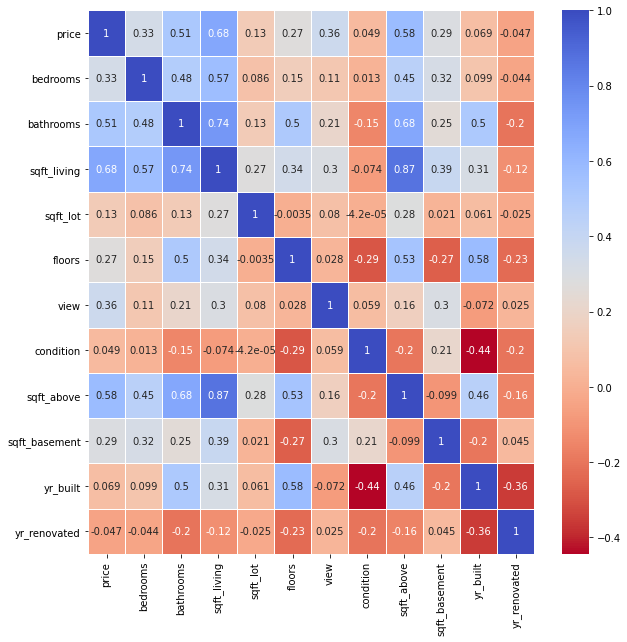

In [23]:
plt.figure(figsize=(10,10))
sns.heatmap(data=data1.drop(columns='waterfront').corr(),linewidths=1,cmap='coolwarm_r',annot=True)

In [24]:
corr=data1.corr()["price"].sort_values(ascending=False)

<AxesSubplot:>

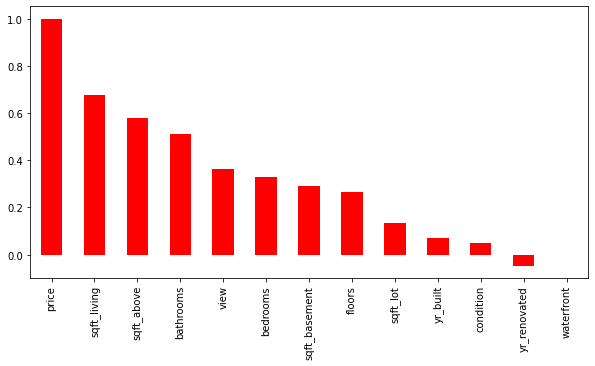

In [25]:
plt.figure(figsize=(10,5))
corr.plot(kind='bar',color='red')

#### we can see that sqft_living,sqft_above,bathrooms,view,bedrooms are highly determinig factor for the price

<AxesSubplot:xlabel='price', ylabel='city'>

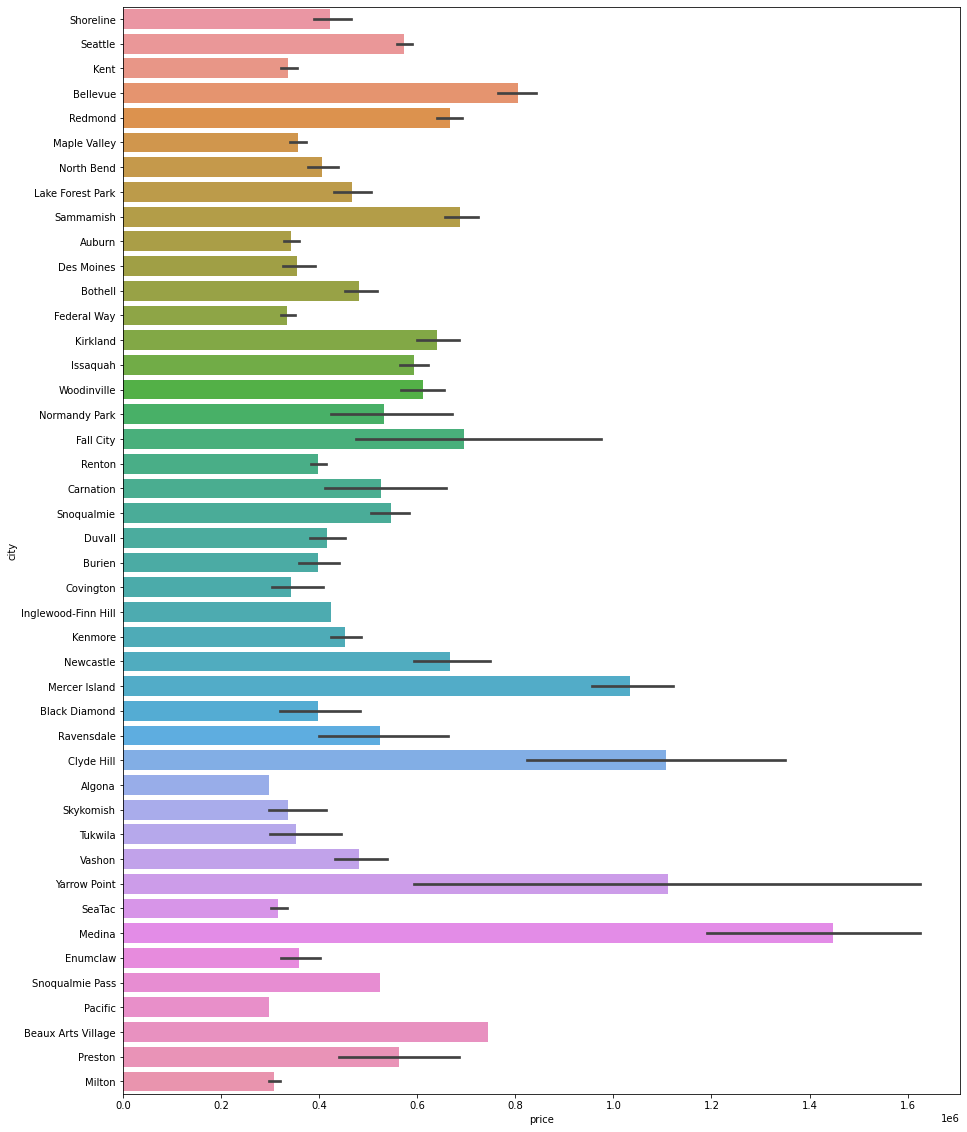

In [26]:
plt.figure(figsize=(15,20))
sns.barplot(data=data1,y='city',x='price',orient="h")

#### In city Medina the  avg house price is highest

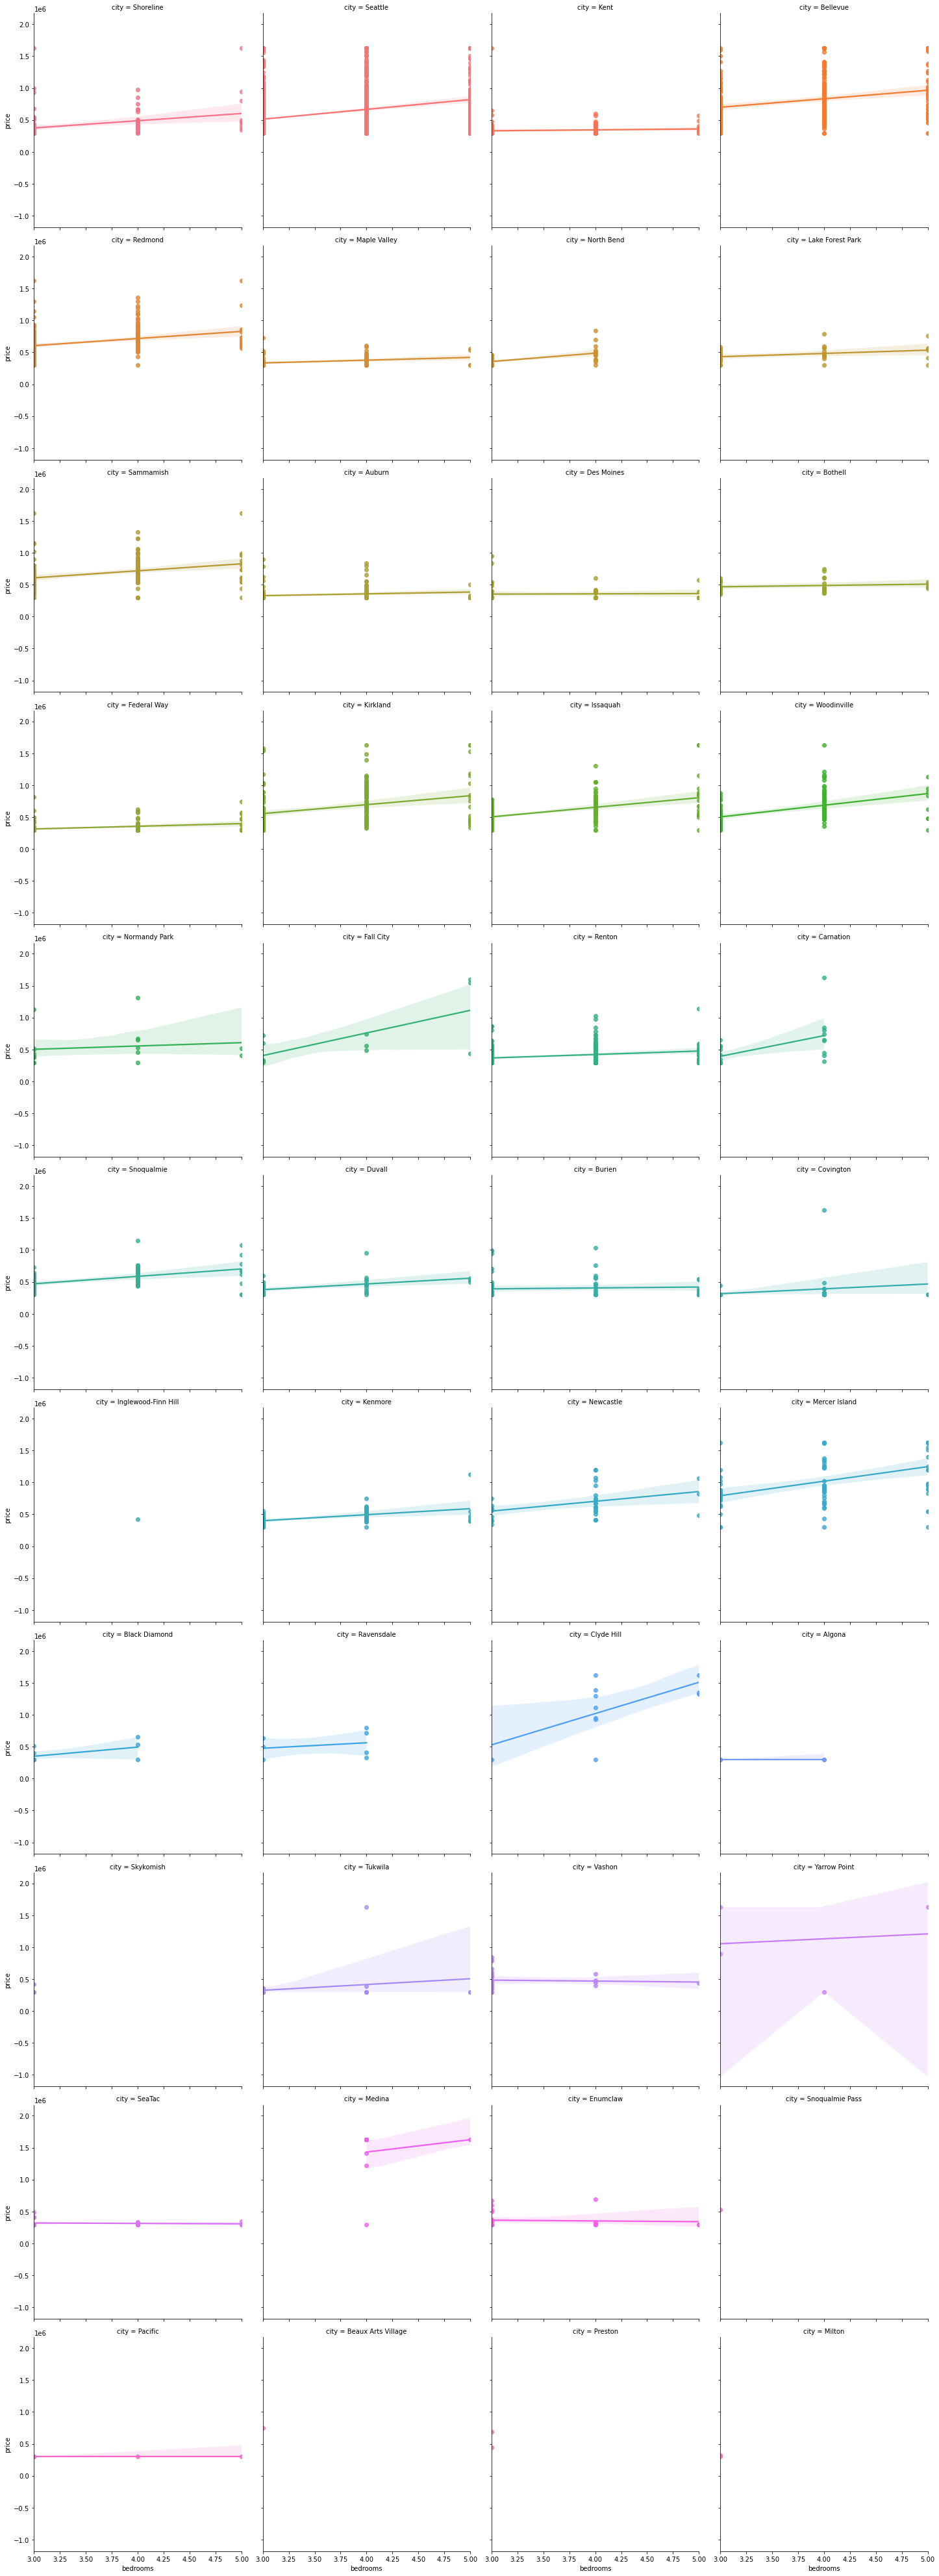

In [27]:
sns.lmplot(x ='bedrooms', y ='price', data = data1,col='city', hue ='city',height=5,col_wrap=4)

#### this is the price vs bedroom plot for different cities
#### city vashon show the highest slop means its price increases fastly with increase in no. of bedroom

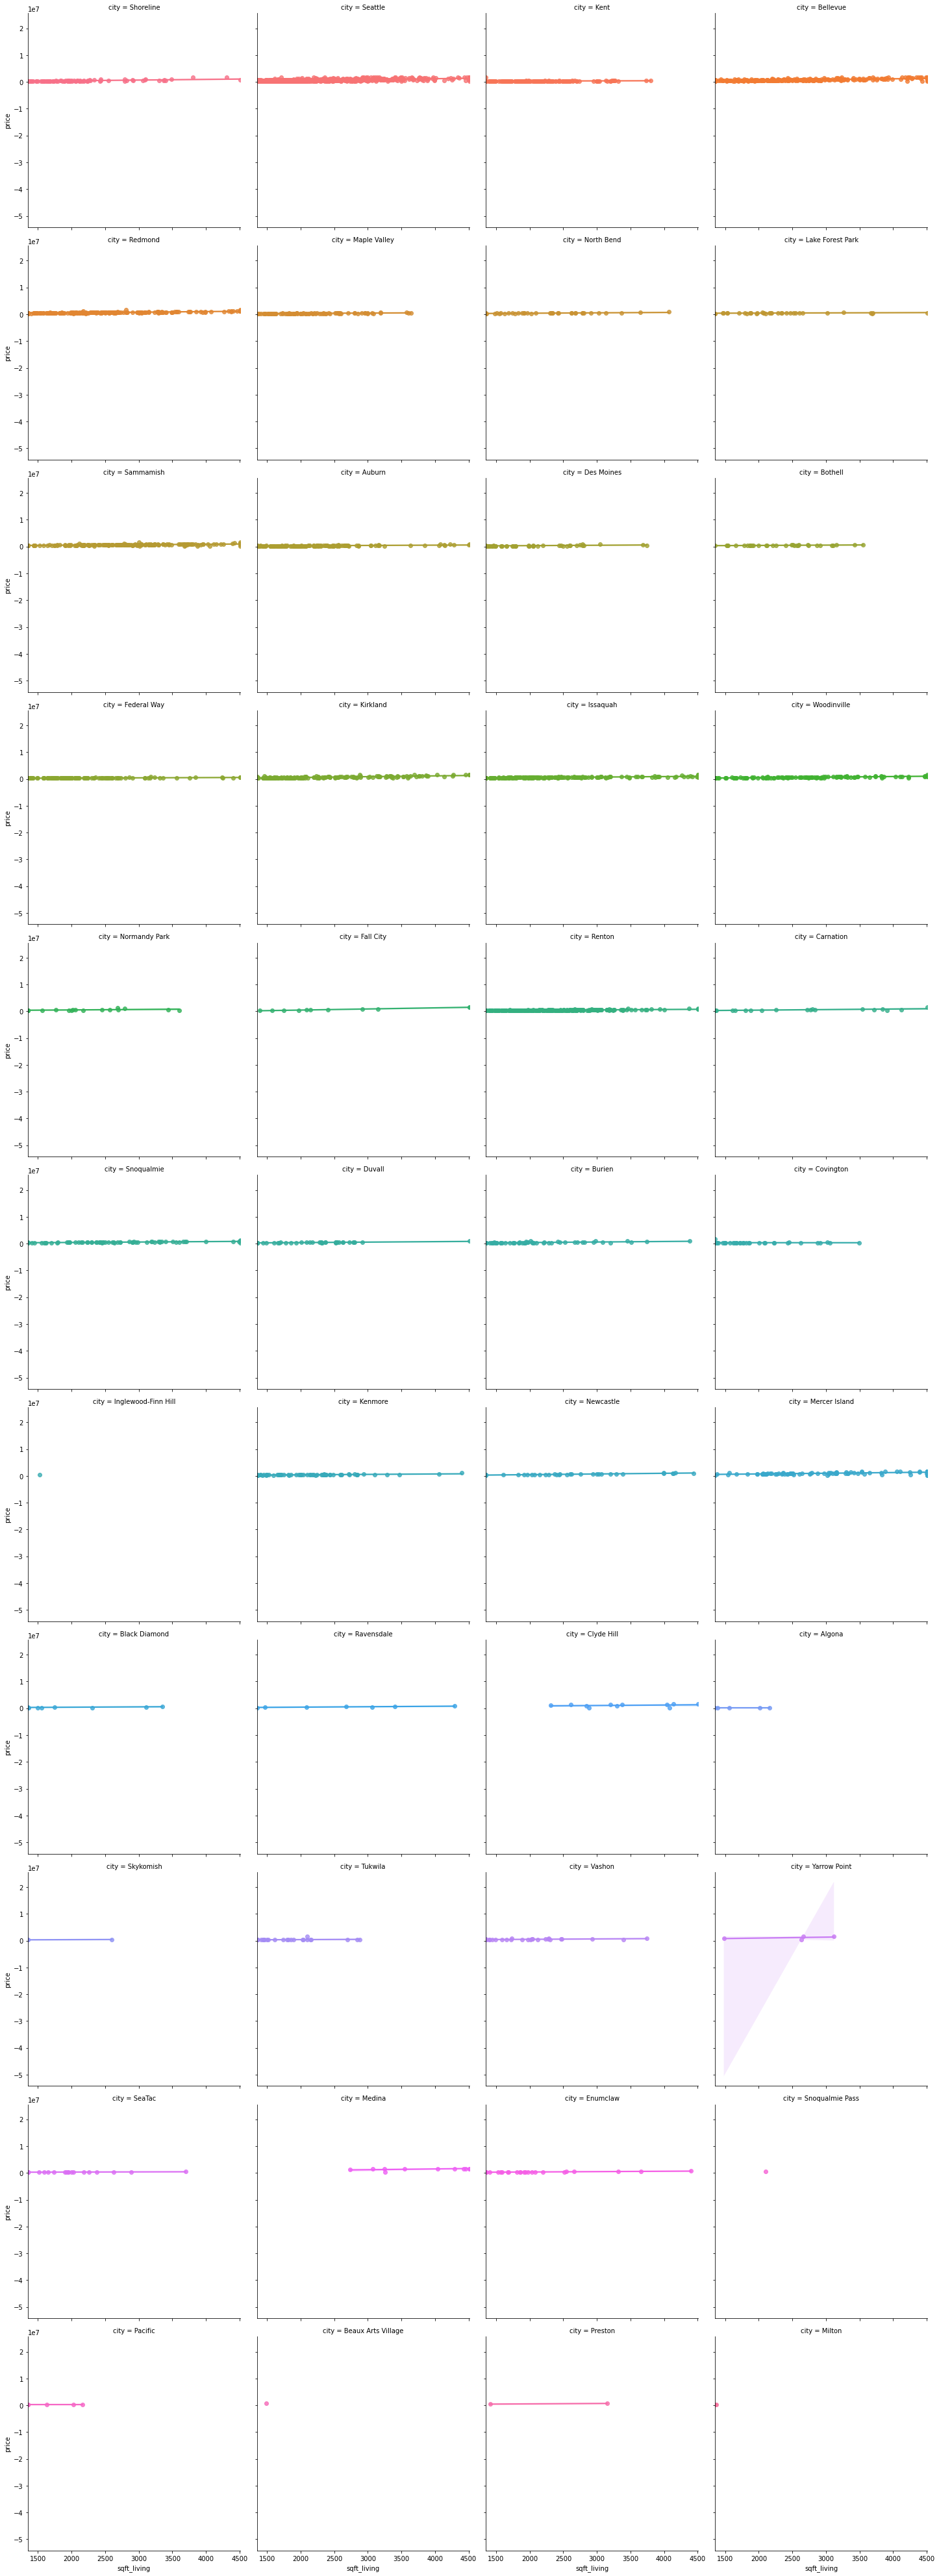

In [28]:
sns.lmplot(x ='sqft_living', y ='price', data = data1,col='city', hue ='city',height=5,col_wrap=4)

### MODEL SELECTION

In [29]:
data2=data1.copy()

In [30]:
sc=StandardScaler()

In [31]:
scaled=sc.fit_transform(data2.drop(columns=['city','price']))
scaled=pd.DataFrame(scaled,columns=data2.drop(columns=['city','price']).columns)

In [32]:
X=scaled
Y=data2[['price']]

In [33]:
X

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,-0.786960,-1.171545,-1.013429,-0.285713,-0.022041,0.0,-0.316807,-0.697321,-0.658843,-0.697520,-0.870306,1.221710
1,2.238545,0.427715,1.819283,-0.222181,0.908144,0.0,3.899134,2.325935,1.972060,-0.057121,-1.261773,-0.825694
2,-0.786960,-0.371915,-0.299093,-0.060446,-0.952226,0.0,-0.316807,0.814307,0.105803,-0.697520,-0.391846,-0.825694
3,-0.786960,0.027900,-0.212880,-0.279125,-0.952226,0.0,-0.316807,0.814307,-0.943966,1.589618,-0.522335,-0.825694
4,0.725792,0.427715,-0.286777,-0.141230,-0.952226,0.0,-0.316807,0.814307,-0.918046,1.132190,0.043118,1.208436
...,...,...,...,...,...,...,...,...,...,...,...,...
4595,-0.786960,-0.771730,-0.816371,-0.372359,-0.952226,0.0,-0.316807,0.814307,-0.438521,-0.697520,-0.913802,1.195161
4596,-0.786960,0.427715,-0.877951,-0.304639,0.908144,0.0,-0.316807,-0.697321,-0.503322,-0.697520,0.347593,1.225795
4597,-0.786960,0.427715,1.031050,-0.335847,0.908144,0.0,-0.316807,-0.697321,1.505496,-0.697520,1.478499,-0.825694
4598,0.725792,-0.371915,-0.102035,-0.357285,-0.952226,0.0,-0.316807,-0.697321,-0.943966,1.635360,-0.043875,-0.825694


In [34]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

In [35]:
lr=LinearRegression()
sgd=SGDRegressor()
lasso=Lasso()
ridge=Ridge()
rf=RandomForestRegressor()
dt=DecisionTreeRegressor()
gboost=GradientBoostingRegressor()
bagging=BaggingRegressor()
adboost=AdaBoostRegressor()
knn=KNeighborsRegressor()
etr=ExtraTreesRegressor()
gamma=GammaRegressor()


In [36]:
algo=[lr,sgd,lasso,ridge,rf,dt,gboost,bagging,adboost,knn,etr]

In [37]:
for i in algo:
    i.fit(x_train,y_train)
    acc=i.score(x_test,y_test)
    print(acc,i)

0.5207274783922474 LinearRegression()
0.5174886394602547 SGDRegressor()
0.5207282973334526 Lasso()
0.5207212249287663 Ridge()
0.5042224568468794 RandomForestRegressor()
0.019991784374475352 DecisionTreeRegressor()
0.5316341990923912 GradientBoostingRegressor()
0.45276815951115645 BaggingRegressor()
0.29304262247373036 AdaBoostRegressor()
0.44011098381029 KNeighborsRegressor()
0.48813586620108473 ExtraTreesRegressor()


In [38]:
lr1=LinearRegression()

In [39]:
rand_state=[]
accuracy=[]
for i in range(1,50,1):
    x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=.30,random_state=i)
    lr1.fit(x_train,y_train)
    accuracy.append(lr1.score(x_test,y_test))
    rand_state.append(i)
    

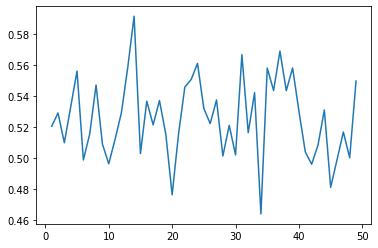

In [40]:
plt.plot(rand_state,accuracy)

In [41]:
for i in range(len(rand_state)):
    print(accuracy[i],rand_state[i])

0.5206258054216184 1
0.5292140804855232 2
0.5100254372876771 3
0.533114668325209 4
0.5562476554982425 5
0.49889267860953035 6
0.5156690620864122 7
0.5472532911163779 8
0.5092547788892212 9
0.49645150213715616 10
0.5122667526805127 11
0.5294374387349343 12
0.5586635239384166 13
0.5916292924724103 14
0.5030559343873361 15
0.536829505587109 16
0.5215249813912248 17
0.5372291277063459 18
0.515576129511681 19
0.47642138979543136 20
0.5153611116942173 21
0.5459071547780652 22
0.550793547707138 23
0.5612235925622835 24
0.5320984937648192 25
0.5223831420477016 26
0.5376268358699041 27
0.5014770980349397 28
0.52122702790994 29
0.5021842522170821 30
0.566819806005135 31
0.5165386189880333 32
0.5423270647195199 33
0.4641000961737868 34
0.5582100504752532 35
0.543703981428404 36
0.5691336749562158 37
0.5436035227418561 38
0.5582668583798773 39
0.5302220737628456 40
0.5041107529076302 41
0.4961536803706046 42
0.508405578025019 43
0.5311274671956152 44
0.4812799412965628 45
0.498984995116982 46
0.51

#### at random state=14,we get max accuracy

In [42]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=14)

In [43]:
lr2=LinearRegression()

In [44]:
lr2.fit(x_train,y_train)

LinearRegression()

In [45]:
lr2.score(x_test,y_test)

0.5916292924724103

In [46]:
y_pred=lr2.predict(x_test)

In [47]:
r2_score(y_test,y_pred) #r square value

0.5916292924724103

In [48]:
y_test1=y_test.copy()
y_test1['predicted_price']=y_pred

In [49]:
y_test1.corr()# accuracy is 77%

,price,predicted_price
price,1.000000,0.772743
predicted_price,0.772743,1.000000


In [50]:
x_value=range(len(y_test))

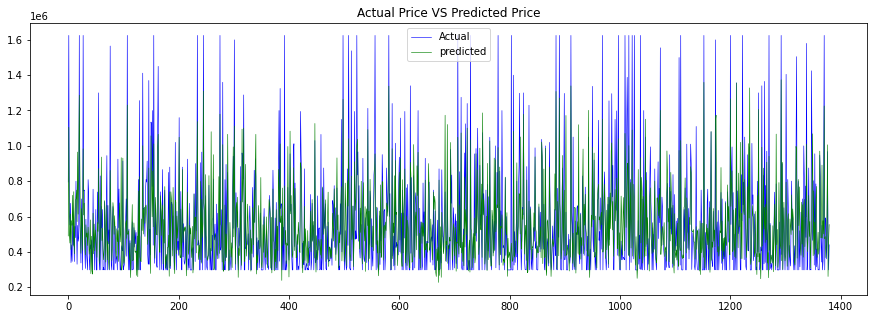

In [51]:
plt.figure(figsize=(15,5))
plt.plot(x_value,y_test,color='blue',label='Actual',lw=.6)
plt.plot(x_value,y_pred,color='green',label='predicted',lw=.6)
plt.legend()
plt.title('Actual Price VS Predicted Price')
plt.show()